## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

This project will use deep learning to train a model to classify traffic signs from the German Traffic Sign Dataset

http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Imageformat

This dataset has the following features:

    * Single-image, multi-class classification problem
    * More than 40 classes
    * More than 50,000 images in total
    * Large, lifelike database
    * Reliable ground-truth data due to semi-automatic annotation
    * Physical traffic sign instances are unique within the dataset (i.e., each real-world traffic sign only occurs once)
    
I will be using the LeNet-5 architecture for my deep learning model - an image of the model can be found below

![LeNet Architecture](lenet.png)
Source: Yan LeCun

---
## Step 0: Load The Data

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load pickled data
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
from tensorflow.contrib.layers import flatten
import tensorflow as tf
from sklearn.utils import shuffle

In [4]:
# Fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
# Number of training examples
n_train = (X_train.shape)[0]

# Number of validation examples
n_validation = (X_valid.shape)[0]

# Number of testing examples.
n_test = (X_test.shape)[0]

# What's the shape of an traffic sign image?
image_shape = (X_train.shape)[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.


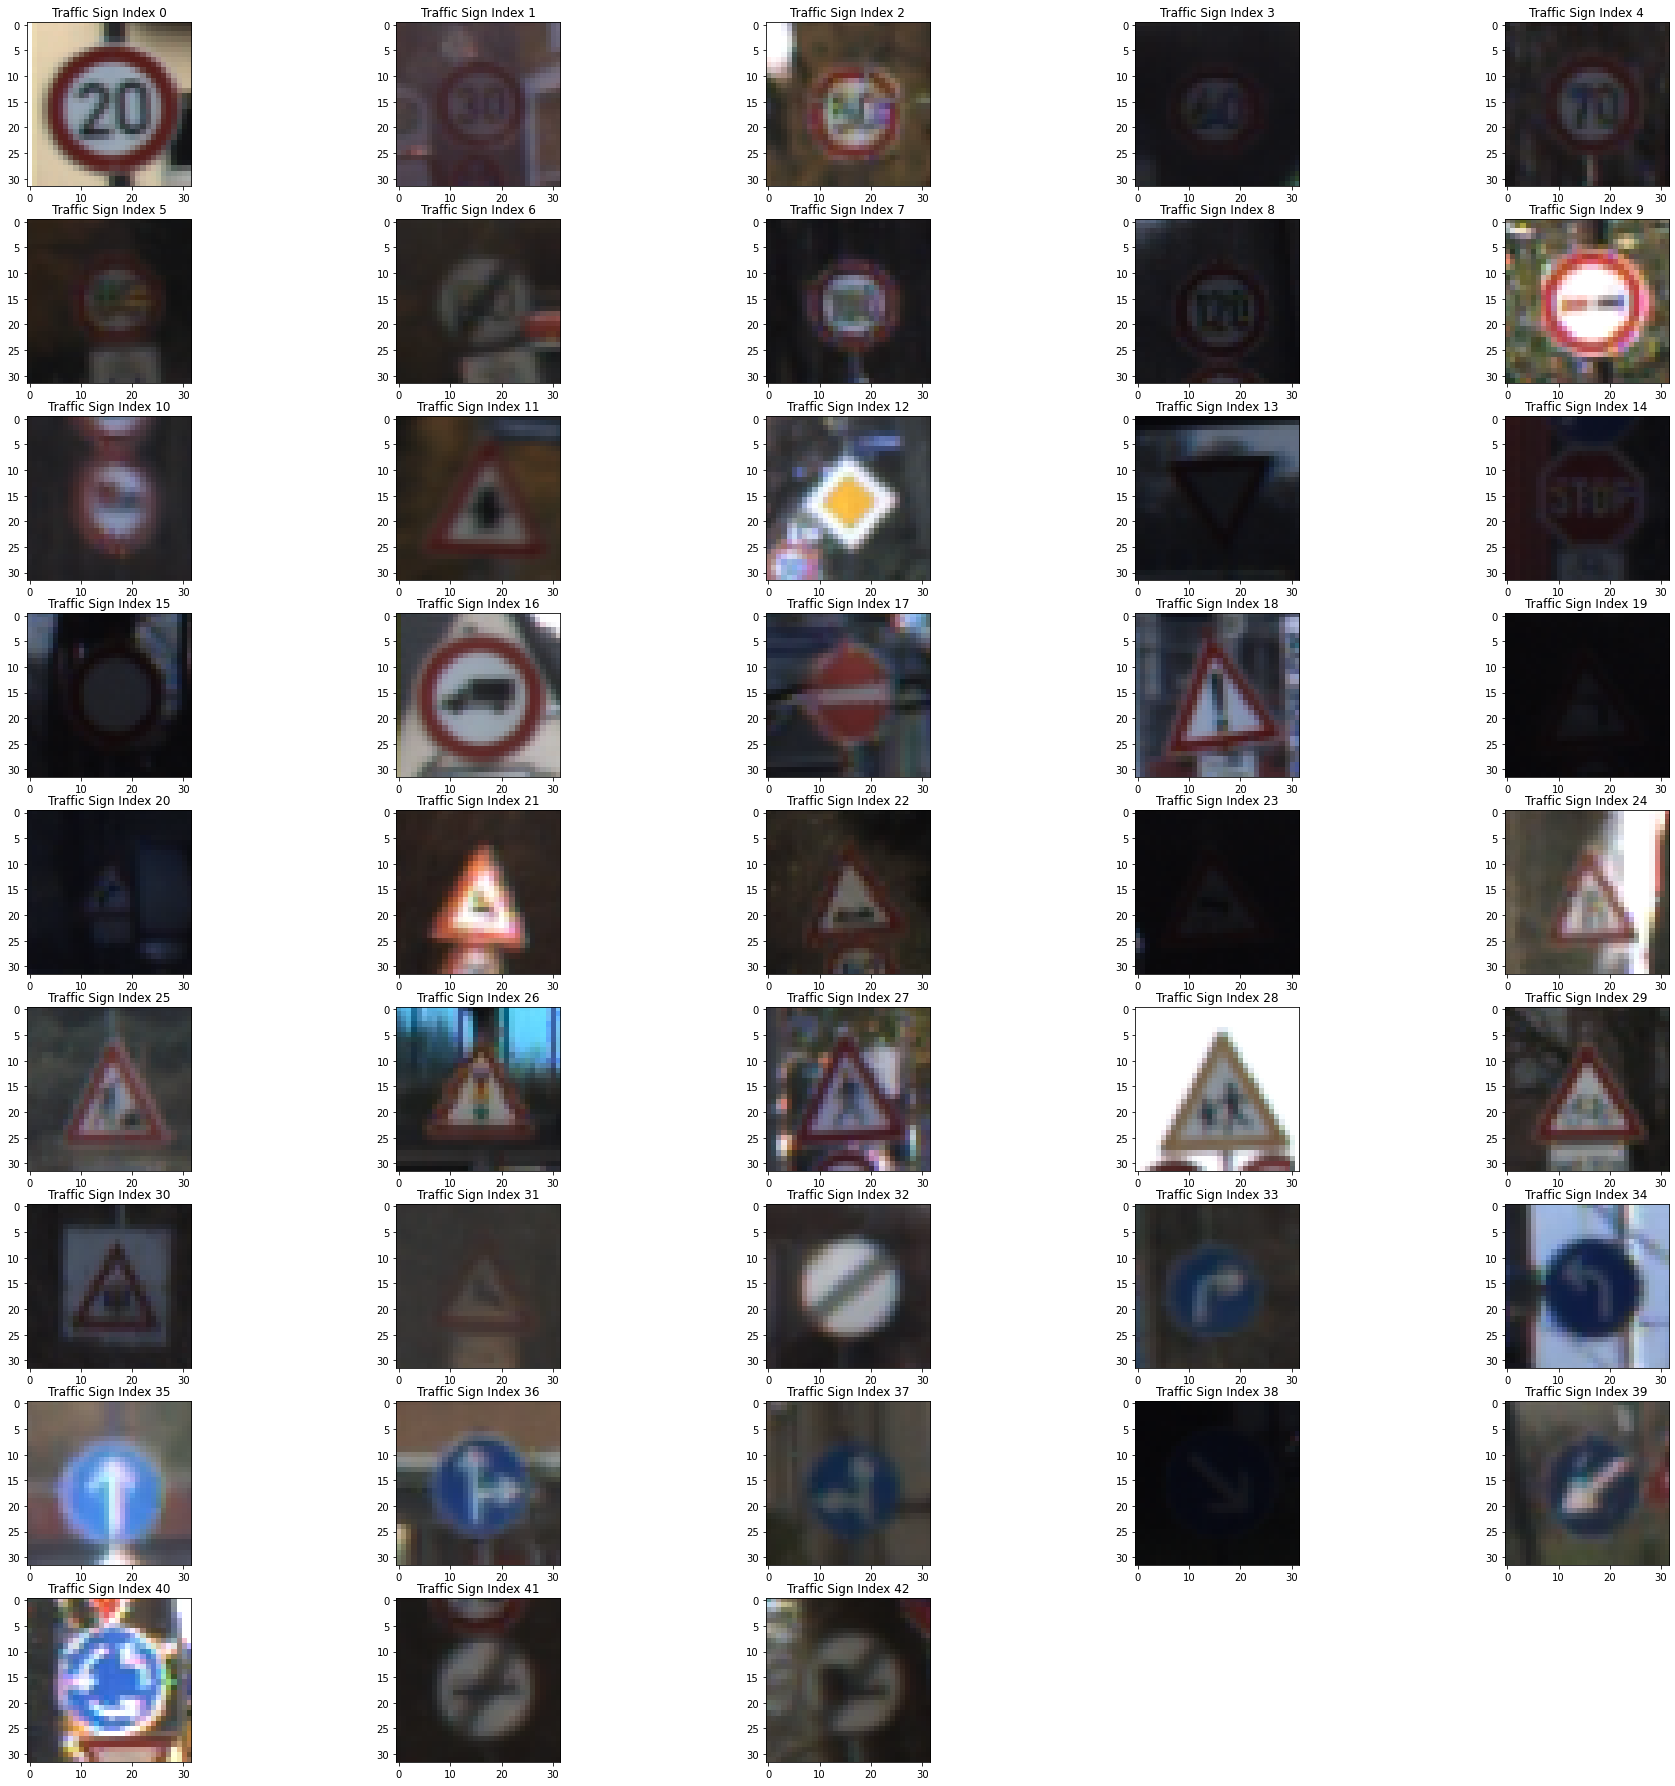

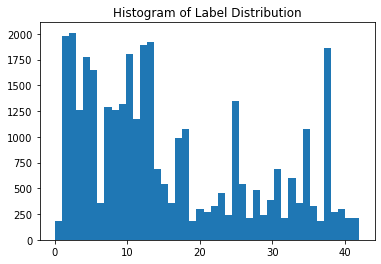

In [4]:
plt.figure(figsize = (32,32))
plots = []

for i in range(9):
    for j in range(5):
        ax = plt.subplot2grid((9,5), (i,j))
        ind = i*5+j
        ax.set_title("Traffic Sign Index {}".format(ind))
        index = ((np.where(y_train == ind))[0][0])
        #index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()
        plt.imshow(image)
        if ind >= 42 :
            break

plt.figure()
x = y_train
plt.hist(x, bins = n_classes)
plt.title("Histogram of Label Distribution")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

The following cell is a work cell to show how setting a zero mean, normalization, and grayscaling are being achieved in the preprocessing steps, only running the cells after this is necessary - do not subtract off the mean multiple times

In [5]:
# #Normalizing the data set for approximately zero mean and equal variance
# print("Original mean of training dataset: " + str(np.mean(X_train)))
# print("Original variance of training dataset: " + str(np.var(X_train)))
# print(X_train.shape)

# #print((X_train[0]).sum(axis=0)/3)
# image = X_train[0].squeeze()
# #print(X_train)

# X_train = X_train - np.mean(X_train, axis = 0)
# X_train = X_train / np.std(X_train, axis = 0)

# X_train_gray = np.zeros([X_train.shape[0],X_train.shape[1], X_train.shape[2]])
# for i in range(n_train):
#     X_train_gray[i] = rgb2gray(X_train[i])

# plt.figure()
# plt.imshow(X_train_gray[0], cmap='gray')
# #X_train = np.array(X_train)
# #X_train = (X_train - 128.0) / 128.0
# print("Normalized mean of training dataset: " + str(np.mean(X_train_gray)))
# print("Normalized variance of training dataset: " + str(np.var(X_train_gray)))
# print(X_train_gray.shape)

# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

# image = X_train[0].squeeze()
# imge_gray = np.zeros([image.shape[0],image.shape[1]])

# for i in range(image.shape[0]):
#     for j in range(image.shape[1]):
#         imge_gray[i,j] = np.sum(image[i,j], axis = 0) / 3

# #imge_gray = imge_gray - np.mean(imge_gray, axis = 0)
# #imge_gray = imge_gray / np.std(imge_gray, axis = 0)

# plt.imshow(imge_gray, cmap = 'gray')
# print(imge_gray.shape)
# print(imge_gray)

# plt.figure()
# gray = rgb2gray(image)
# plt.imshow(gray, cmap='gray')

#### Only run the following cells when training the model 

One method for normaliziing the dataset was to subtract 128 from each pixel (range 0-255) and divide by 128, this simulates an approximate mean of zero and equal variance. In practice, it was found that the data could be trained more accurately by using the numpy mean and variance functions to set the mean to zero and variance to 1

First Mean of training dataset: [-4.35120232e-16]
First Standard Deviation of training dataset: [1.]
First Mean of validation dataset: [2.23433013e-15]
First Standard Deviation of validation dataset: [1.]
First Mean of testing dataset: [1.65893515e-15]
First Standard Deviation of test dataset: [1.]


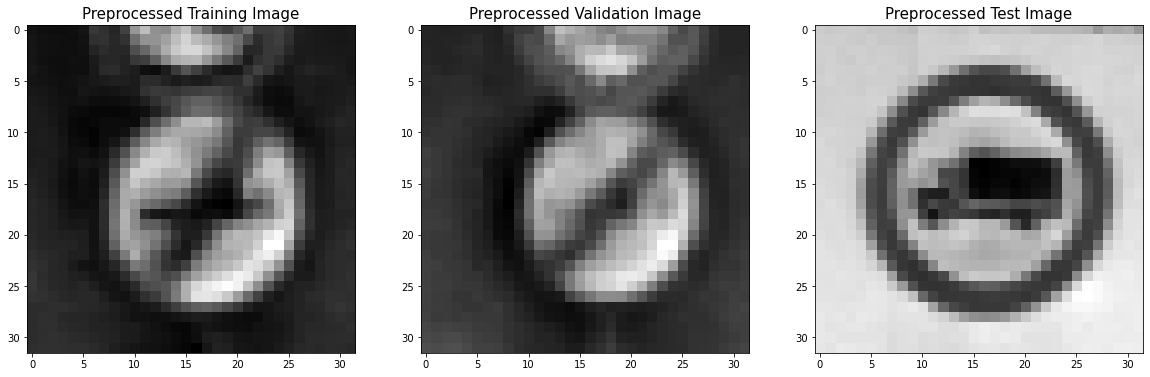

In [6]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

## Normalize the train and test datasets to (-1,1)

# X_train_normalized = (X_train_gry - 128)/128 
# X_valid_normalized = (X_valid_gry - 128)/128 
# X_test_normalized = (X_test_gry - 128)/128

# X_train = X_train_normalized
# X_valid = X_valid_normalized
# X_test = X_test_normalized

X_train = X_train_gry - np.mean(X_train_gry, axis = 0)
X_train = X_train / np.std(X_train, axis = 0)

X_valid = X_valid_gry - np.mean(X_valid_gry, axis = 0)
X_valid = X_valid / np.std(X_valid, axis = 0)
    
X_test = X_test_gry - np.mean(X_test_gry, axis = 0)
X_test = X_test / np.std(X_test, axis = 0)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(X_train[0].squeeze(), cmap='gray')
ax1.set_title('Preprocessed Training Image', fontsize=15)
ax2.imshow(X_valid[0].squeeze(), cmap='gray')
ax2.set_title('Preprocessed Validation Image', fontsize=15)
ax3.imshow(X_test[0].squeeze(), cmap='gray')
ax3.set_title('Preprocessed Test Image', fontsize=15)

print("First Mean of training dataset: {}".format(np.mean(X_train, axis = 0)[0][0]))
print("First Standard Deviation of training dataset: {}".format(np.std(X_train, axis = 0)[0][0]))

print("First Mean of validation dataset: {}".format(np.mean(X_valid, axis = 0)[0][0]))
print("First Standard Deviation of validation dataset: {}".format(np.std(X_valid, axis = 0)[0][0]))

print("First Mean of testing dataset: {}".format(np.mean(X_test, axis = 0)[0][0]))
print("First Standard Deviation of test dataset: {}".format(np.std(X_test, axis = 0)[0][0]))

## Model Architecture - LeNet-5

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Color images in the german traffic databases means 3 color channels, but the data was converted to grayscale so C=1. Note that dropout was only used on the fully connected layers as convolutional layers are not very dense and research has shown that dropout is only useful between fully connected layers.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** ReLu activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** ReLu activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** ReLu activation function.

**Dropout.** Keep probability.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** ReLu activation function.

**Dropout.** Keep probability.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.


In [6]:
EPOCHS = 40
BATCH_SIZE = 100

In [7]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    #fc1    = tf.nn.dropout(fc1,.8)

    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1    = tf.nn.dropout(fc1,keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2    = tf.nn.dropout(fc2,keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify the German traffic sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) #probability to keep units
one_hot_y = tf.one_hot(y, 43)

# Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Training Pipeline

In [9]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.693

EPOCH 2 ...
Validation Accuracy = 0.835

EPOCH 3 ...
Validation Accuracy = 0.889

EPOCH 4 ...
Validation Accuracy = 0.887

EPOCH 5 ...
Validation Accuracy = 0.912

EPOCH 6 ...
Validation Accuracy = 0.916

EPOCH 7 ...
Validation Accuracy = 0.923

EPOCH 8 ...
Validation Accuracy = 0.930

EPOCH 9 ...
Validation Accuracy = 0.928

EPOCH 10 ...
Validation Accuracy = 0.934

EPOCH 11 ...
Validation Accuracy = 0.928

EPOCH 12 ...
Validation Accuracy = 0.933

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.934

EPOCH 15 ...
Validation Accuracy = 0.942

EPOCH 16 ...
Validation Accuracy = 0.941

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 18 ...
Validation Accuracy = 0.947

EPOCH 19 ...
Validation Accuracy = 0.944

EPOCH 20 ...
Validation Accuracy = 0.943

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 22 ...
Validation Accuracy = 0.945

EPOCH 23 ...
Validation Accuracy = 0.949

EPOCH 24 ...
Validation Accura

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 0.997


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.927


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

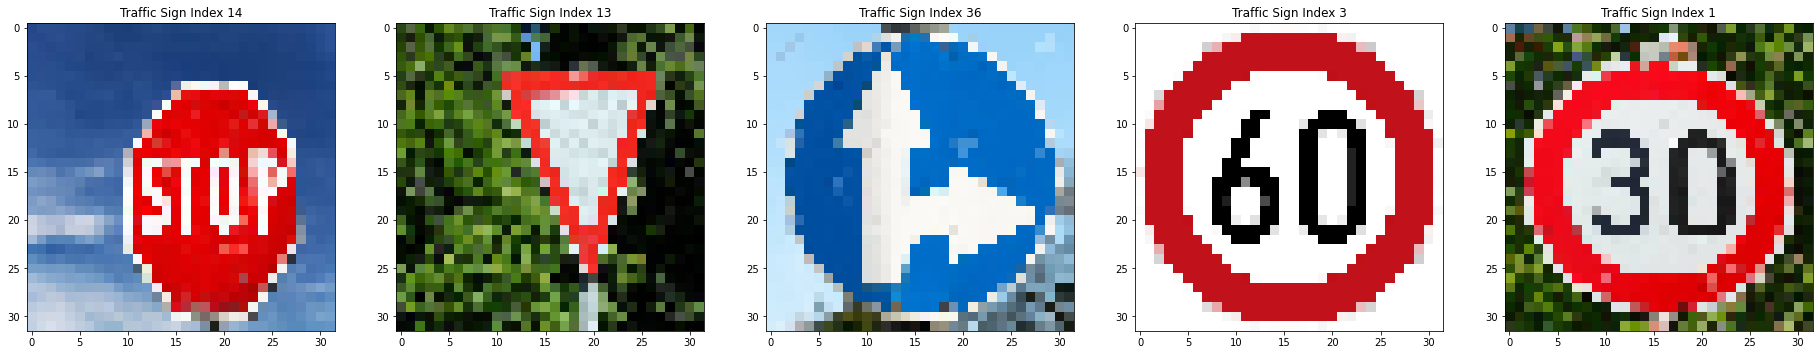

In [12]:
import glob
import cv2

X_new_test = []
y_new_test = [14, 13, 36, 3, 1]
# Make a list of new images
images = glob.glob('new_test_imgs/*.jpg')

# Putting the images in the same format as my other data
for fname in images:
    img = cv2.imread(fname)
    imgResized = cv2.resize(img,(32,32))
    imgRGB = cv2.cvtColor(imgResized,cv2.COLOR_BGR2RGB)
    X_new_test.append(imgRGB)

plt.figure(figsize = (32,32))
plots = []

for j in range(5):
    ax = plt.subplot2grid((2,5), (1,j))
    ind = j
    image = X_new_test[ind].squeeze()
    ax.set_title("Traffic Sign Index {}".format(y_new_test[ind]))
    plt.imshow(image)


### Preprocessing the images

Shape of testing examples = (5, 32, 32, 3)
First Mean of testing dataset: [1.11022302e-17]
First Standard Deviation of test dataset: [1.]


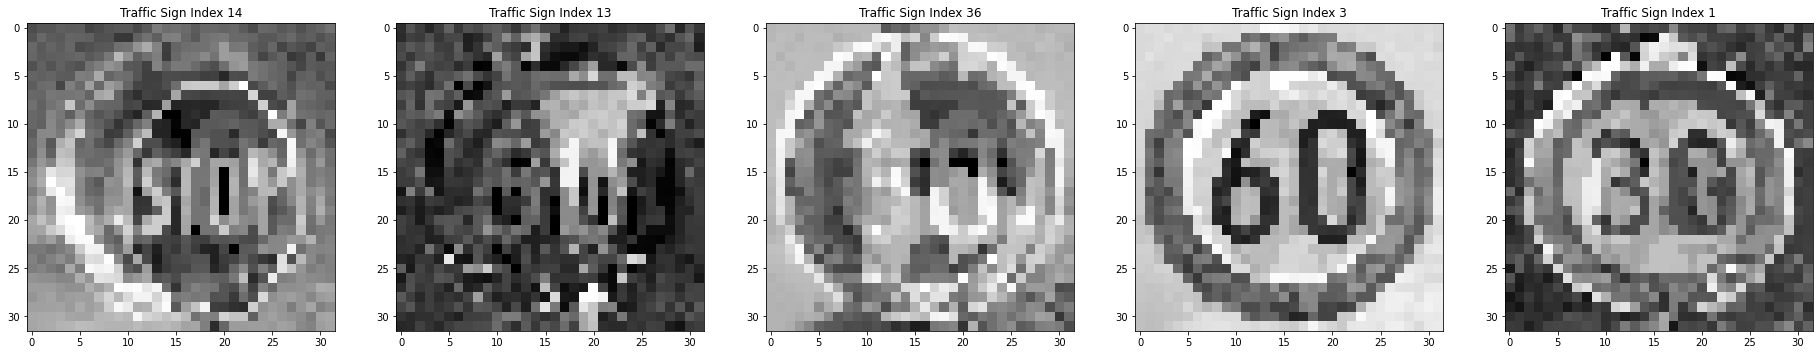

In [13]:
print("Shape of testing examples =", np.shape(X_new_test))
# Convert to grayscale
X_new_test_rgb = np.asarray(X_new_test)
X_new_test_gry = np.sum(X_new_test_rgb/3, axis=3, keepdims=True)
    
X_new_test = X_new_test_gry - np.mean(X_new_test_gry, axis = 0)
X_new_test = X_new_test / np.std(X_new_test, axis = 0)

plt.figure(figsize = (32,32))
plots = []

for j in range(5):
    ax = plt.subplot2grid((2,5), (1,j))
    ind = j
    image = X_new_test[ind].squeeze()
    ax.set_title("Traffic Sign Index {}".format(y_new_test[ind]))
    plt.imshow(image, cmap = 'gray')
    
print("First Mean of testing dataset: {}".format(np.mean(X_new_test, axis = 0)[0][0]))
print("First Standard Deviation of test dataset: {}".format(np.std(X_new_test, axis = 0)[0][0]))

### Predict the Sign Type for Each Image

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_new_test, y_new_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


<Figure size 2304x2304 with 0 Axes>

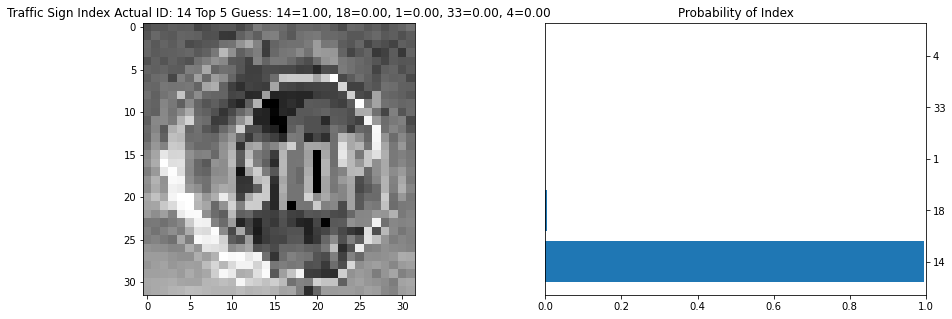

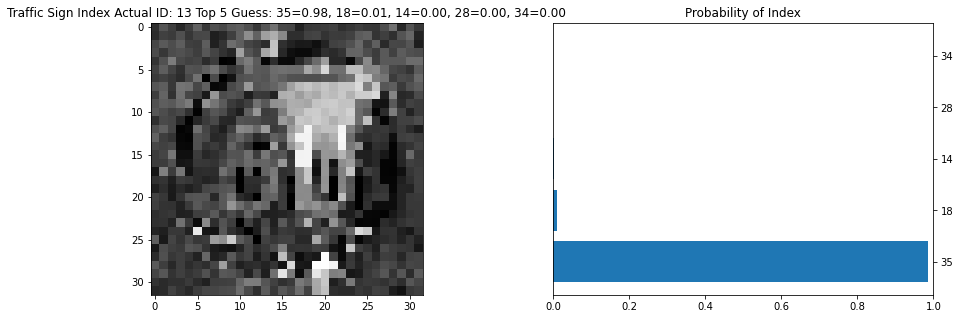

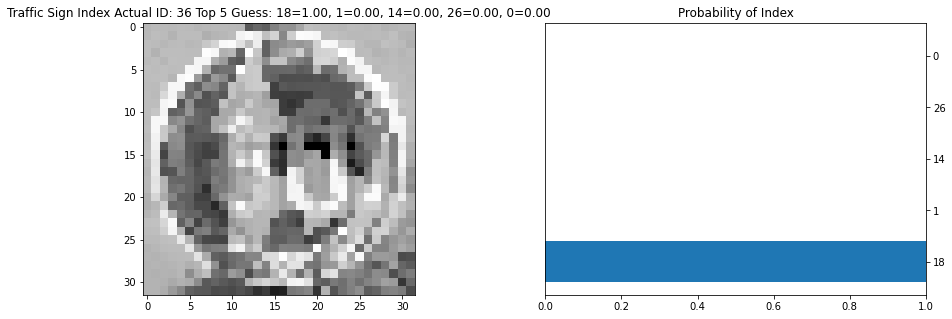

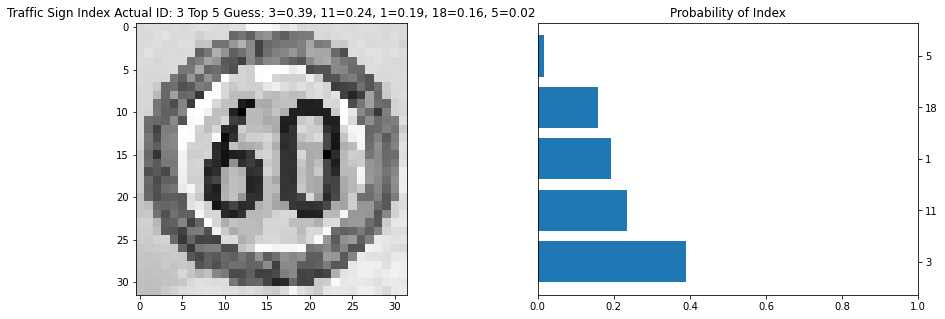

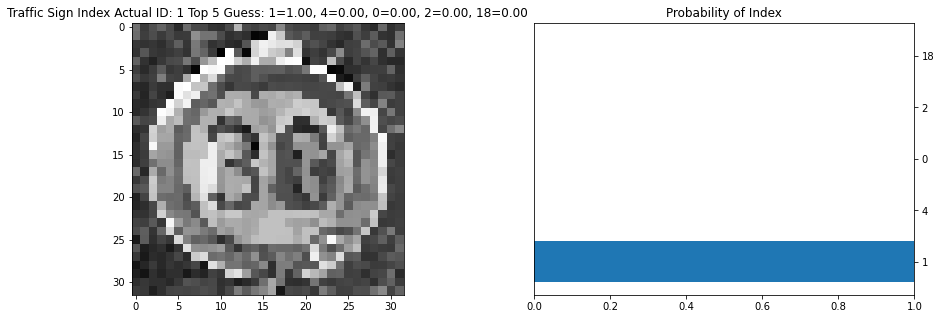

In [18]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_new_test, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: X_new_test, keep_prob: 1.0})

plt.figure(figsize = (32,32))
plots = []

for j in range(5):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ind = j
    image = X_new_test[ind].squeeze()
    top5_probs = [my_top_k[0][j][0], my_top_k[0][j][1], my_top_k[0][j][2], my_top_k[0][j][3], my_top_k[0][j][4]]
    top5_index = [my_top_k[1][j][0], my_top_k[1][j][1], my_top_k[1][j][2], my_top_k[1][j][3], my_top_k[1][j][4]]

    ax1.set_title("Traffic Sign Index Actual ID: {} Top 5 Guess: {}={:.2f}, {}={:.2f}, {}={:.2f}, {}={:.2f}, {}={:.2f}"
                 .format(y_new_test[ind],top5_index[0],top5_probs[0],
                         top5_index[1],top5_probs[1],
                         top5_index[2],top5_probs[2],
                         top5_index[3],top5_probs[3],
                         top5_index[4],top5_probs[4]))
    ax1.imshow(image, cmap = 'gray')
    
    y_pos = np.arange(5)
    ax2.barh(y_pos, top5_probs, align='center')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(top5_index)
    ax2.yaxis.set_ticks_position('right')
    ax2.set_title('Probability of Index')
    ax2.set_xlim([0, 1])
    plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet


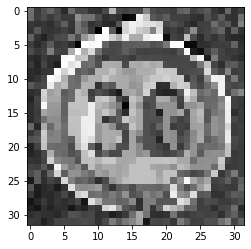

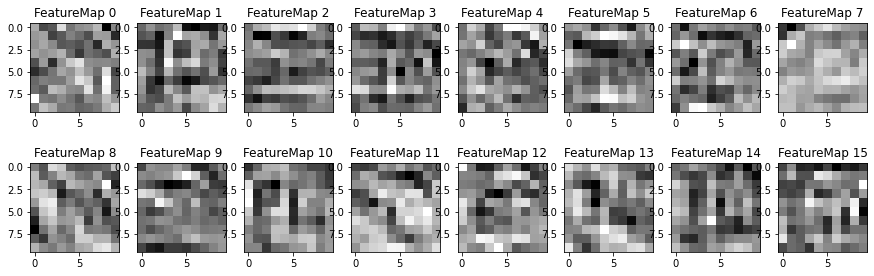

In [20]:
img = np.zeros((1,32,32,1))
img[0,:,:,:] = X_new_test[4]
image_input = img
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))  
    conv_1 = tf.get_default_graph().get_tensor_by_name("Conv2D_1:0")
    plt.imshow(np.squeeze(image_input),cmap='gray')
    plt.show()
    outputFeatureMap(image_input, conv_1)